In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

import seaborn as sns
sns.set_style('whitegrid')

In [182]:
df= pd.read_csv('Unicorntable_india.csv',index_col='No.')
df.head()

,Company,Sector,Publicly Listed,Entry Valuation($B),Valuation ($B),Entry,Formar Unicorn,Location,Select Investors
No.,,,,,,,,,
1,InMobi,Adtech - Mobile Ads,0,1.0,1.0,11-Sep,0,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
2,Flipkart,E-Commerce,1,1.0,37.6,12-Feb,0,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
3,Mu Sigma,SaaS - Analytics,0,1.0,1.5,13-Feb,0,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
4,Snapdeal,E-Commerce,0,1.8,2.4,14-Oct,1,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
5,PayTM,Fintech - Payments & Wallet,1,1.7,16.0,15-Feb,0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [8]:
df.shape

(102, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 1 to 102
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              102 non-null    object 
 1   Sector               102 non-null    object 
 2   Publicly Listed      102 non-null    int64  
 3   Entry Valuation($B)  102 non-null    float64
 4   Valuation ($B)       102 non-null    float64
 5   Entry                102 non-null    object 
 6   Formar Unicorn       102 non-null    int64  
 7   Location             102 non-null    object 
 8   Select Investors     102 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 8.0+ KB


UNIVARIATE ANALYSIS

In [117]:
#1. Distribution across sector

px.pie(names= df['Sector'].value_counts()[:15].index, values= df['Sector'].value_counts()[:15].values)


After regrouping the sectors for eg. taking B2B Ecommerce end Ecommerce as Ecommerce & different breaking of Fintech as Fintech only, following pie-chart is obtained

In [183]:
df['Sector_classification']= df['Sector'].apply(lambda x: x.split()[1] if 'B2B' in x else 
                                                  x if x =='E-Commerce' else
                                                  x.split()[0] if '-' in x else 
                                                  x)

In [ ]:
df[df['Sector']=='Fintech - B2B Payments']

df.loc[18, 'Sector_classification']= 'Fintech'

df[df['Sector_classification']=='Social']

df.loc[10, 'Sector_classification']= 'Social Media'

In [145]:
px.pie(names= df['Sector_classification'].value_counts().index, values= df['Sector_classification'].value_counts().values,
      labels= df['Sector_classification'].value_counts().index)

TOP 5 SECTORS ARE:

1. Fintech 15.7%
2. E-commerce 15.7%
3. SAAS 15.7%
4. Marketplace 8.82%
5. Edtech 6.86%

Together they combine to form 62.7% of unicorn startups in India

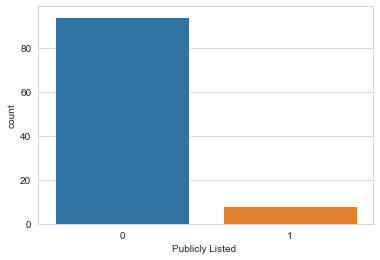

In [21]:
#2. if the company is publicly lister or not

sns.countplot(df['Publicly Listed '])
# we find that 94 companies are not yet publicly listed . Only 8 are.

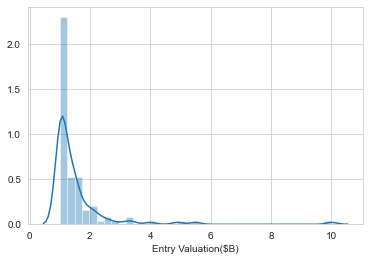

In [58]:
#3. Entry Valuation: Valuation of the company at the time of entry

sns.distplot(df['Entry Valuation($B)'], kde= True)

# the data is extremely skewed to the left
# 33 companies have entry valuations = 1 bn$; 46 companies have higher entry valuation than the median= 1.2 bn$

In [59]:
unicorns_higher_than_median = df[df['Entry Valuation($B)']>df['Entry Valuation($B)'].median()].sort_values(
     by= ['Entry Valuation($B)'], ascending= False)


px.bar(data_frame= unicorns_higher_than_median.iloc[:15], x= 'Company', y='Entry Valuation($B)')

Bargraph showing the top 15 companies with highest Entry Valuations

In [189]:
#4. Valuation: this column shows the current valuation of the companies. From this we can calculate the growth rate. 

high_growth_df= df.loc[:, ['Company', 'Valuation ($B)','Entry Valuation($B)','Sector_classification']].sort_values('Entry Valuation($B)', ascending= False)
high_growth_df['growth_indicator']= high_growth_df['Valuation ($B)'] - high_growth_df['Entry Valuation($B)']

In [190]:
px.scatter(data_frame=high_growth_df.sort_values('growth_indicator', ascending= False)[:15],x= 'Company',
           y= 'growth_indicator', size= 'Entry Valuation($B)')

Bubble chart showing the trend in growth rate of the companies and the size of bubble shows their entry valuation
From this we can see that Flipkart has the highest growth rate

In [155]:
high_growth_df[high_growth_df['growth_indicator']==36.6]

,Company,Valuation ($B),Entry Valuation($B),Sector_classification,growth_indicator
No.,,,,,
2,Flipkart,37.6,1.0,E-Commerce,36.6


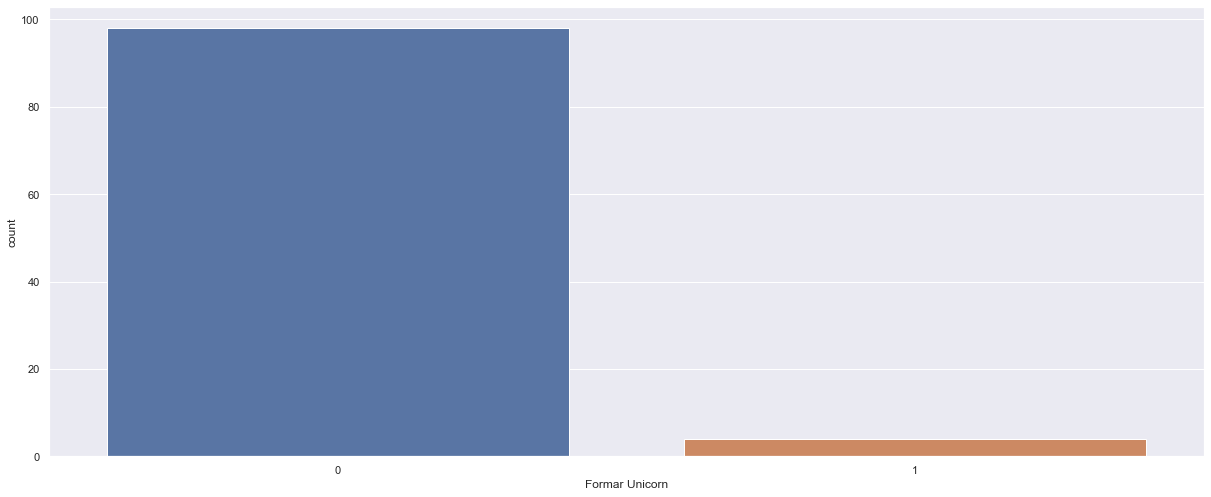

In [102]:
#5. Analyzing Former unicorns

sns.countplot(df['Formar Unicorn'])

# only 4 startups were earlier the unicorns

In [103]:
#5. Location parameters

df['Location'].value_counts()[:10]

# there are some companies which have Indian as well as Foreign presence

Bangalore                  33
Gurgaon                    14
Mumbai                     12
Delhi                       7
Noida                       4
Pune                        4
Bangalore/Singapore         3
Bangalore/San Francisco     3
Jaipur                      2
Chennai                     2
Name: Location, dtype: int64

In [91]:
# preparing data wrt the location of the companies in India
df['Location_India']= df['Location'].apply(lambda x: x.split('/')[0] if '/' in x else x)

# mostly the start ups in India are located only across 12 positons

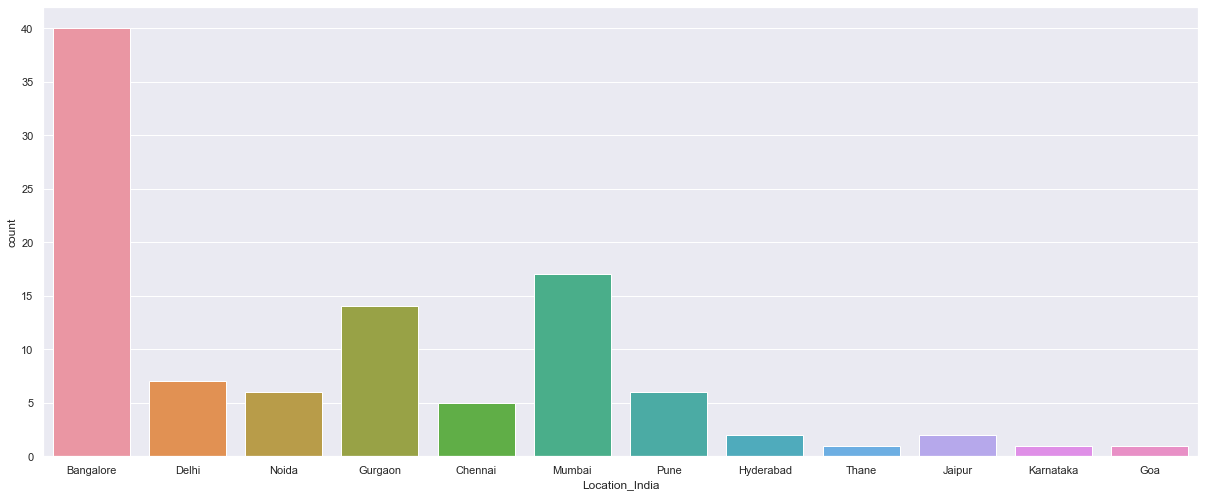

In [100]:
sns.countplot(df['Location_India'])
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [107]:
#6. Select Investors: INVESTORS to start ups



In [108]:
df.columns

Index(['Company', 'Sector', 'Publicly Listed ', 'Entry Valuation($B)',
       'Valuation ($B)', 'Entry', 'Formar Unicorn', 'Location',
       'Select Investors', 'Location_India'],
      dtype='object')

`BIVARIATE ANALYSIS

Max number of startups in EdTech space

In [131]:
#1. Analysis of start ups wrt locations

px.pie(names= df['Location_India'].value_counts().index, values= df['Location_India'].value_counts().values, 
      labels= df['Location_India'].value_counts().index)

40% of the start ups are in Bangalore ONLY

In [130]:
#3. SECTOR WISE BREAK UP AND IDENTIFYING KEY COMPANIES IN EACH SECTOR 

In [146]:
df.columns

Index(['Company', 'Sector', 'Publicly Listed ', 'Entry Valuation($B)',
       'Valuation ($B)', 'Entry', 'Formar Unicorn', 'Location',
       'Select Investors', 'Location_India', 'Sector_classification'],
      dtype='object')

In [191]:
high_growth_df

,Company,Valuation ($B),Entry Valuation($B),Sector_classification,growth_indicator
No.,,,,,
86,Polygon,10.0,10.0,Web3,0.0
34,PhonePe,5.5,5.5,Fintech,0.0
16,OYO Rooms,9.6,4.9,Proptech,4.7
53,BrowserStack,4.0,4.0,SaaS,0.0
77,Upstox,3.4,3.4,Fintech,0.0
...,...,...,...,...,...
67,Licious,1.3,1.0,D2C,0.3
17,Udaan,3.1,1.0,E-Commerce,2.1
75,NoBroker,1.0,1.0,Proptech,0.0


In [158]:
df.groupby('Sector_classification')['grow']

In [193]:
px.bar(x=high_growth_df['Company'],y=high_growth_df['Valuation ($B)'], color= high_growth_df['Sector_classification'])

In [194]:
#Companies vs Sector

In [197]:
#1. fintech sector

px.bar(data_frame= df[df['Sector_classification']=='Fintech'].sort_values(by= 'Valuation ($B)', ascending= False),
      x= 'Company', y='Valuation ($B)')

In [198]:
#2. E-commerce

px.bar(data_frame= df[df['Sector_classification']=='E-Commerce'].sort_values(by= 'Valuation ($B)', ascending= False),
       x= 'Company', y='Valuation ($B)')

In [199]:
#3. Saas

px.bar(data_frame= df[df['Sector_classification']=='SaaS'].sort_values(by= 'Valuation ($B)', ascending= False),
       x= 'Company', y='Valuation ($B)')

In [200]:
#4. Marketplace

px.bar(data_frame= df[df['Sector_classification']=='Marketplace'].sort_values(by= 'Valuation ($B)', ascending= False),
       x= 'Company', y='Valuation ($B)')

In [201]:
#4. Edtech

px.bar(data_frame= df[df['Sector_classification']=='Edtech'].sort_values(by= 'Valuation ($B)', ascending= False),
       x= 'Company', y='Valuation ($B)')

In [209]:
df.groupby('Sector_classification')['Valuation ($B)'].max().nlargest(10)

Sector_classification
E-Commerce    37.6
Edtech        22.0
Fintech       16.0
Foodtech      10.7
Web3          10.0
Proptech       9.6
Gaming         8.0
Mobility       7.3
SaaS           5.6
Content        5.0
Name: Valuation ($B), dtype: float64

In [210]:
high_growth_df.groupby('Sector_classification')['growth_indicator'].max().nlargest(10)

Sector_classification
E-Commerce    36.6
Edtech        21.0
Fintech       14.3
Foodtech       9.3
Gaming         7.0
Mobility       5.7
Proptech       4.7
Content        4.0
SaaS           4.0
NBFC           3.5
Name: growth_indicator, dtype: float64